In [1]:
# %pip install tensorflow

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [5]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [6]:
for x,y in training_set:
    print(x, x.shape)
    print(y, y.shape)
    break

tf.Tensor(
[[[[191.   183.   180.  ]
   [193.25 185.25 182.25]
   [193.75 185.75 182.75]
   ...
   [174.25 161.25 155.25]
   [167.75 154.75 148.75]
   [174.5  161.5  155.5 ]]

  [[194.75 186.75 183.75]
   [195.5  187.5  184.5 ]
   [195.   187.   184.  ]
   ...
   [160.75 147.75 141.75]
   [158.   145.   139.  ]
   [168.75 155.75 149.75]]

  [[199.25 191.25 188.25]
   [198.   190.   187.  ]
   [196.25 188.25 185.25]
   ...
   [151.75 138.75 132.75]
   [166.75 153.75 147.75]
   [155.   142.   136.  ]]

  ...

  [[193.   188.   185.  ]
   [188.25 183.25 180.25]
   [194.5  189.5  186.5 ]
   ...
   [162.5  145.5  137.5 ]
   [148.25 131.25 123.25]
   [145.75 128.75 120.75]]

  [[186.   181.   178.  ]
   [198.5  193.5  190.5 ]
   [192.75 187.75 184.75]
   ...
   [151.5  134.5  126.5 ]
   [161.25 144.25 136.25]
   [156.   139.   131.  ]]

  [[189.25 184.25 181.25]
   [194.25 189.25 186.25]
   [192.5  187.5  184.5 ]
   ...
   [168.25 151.25 143.25]
   [161.   144.   136.  ]
   [155.5  138.5  13

In [7]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential

In [8]:
model = tf.keras.models.Sequential()


In [9]:
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

c:\Users\nuell\miniconda3\envs\my_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(tf.keras.layers.Dropout(0.25))


In [15]:
model.add(tf.keras.layers.Flatten())


In [16]:
model.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [17]:
model.add(tf.keras.layers.Dropout(0.4))


In [18]:
#Output Layer
model.add(tf.keras.layers.Dense(units=38,activation='softmax'))

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# training_history = model.fit(x=training_set,validation_data=validation_set,epochs=6)
# retrained the model and changeed epochs from 10 to 6

Epoch 1/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4825s 2s/step - accuracy: 0.9821 - loss: 0.0571 - val_accuracy: 0.9674 - val_loss: 0.1168
Epoch 2/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4867s 2s/step - accuracy: 0.9837 - loss: 0.0525 - val_accuracy: 0.9593 - val_loss: 0.1429
Epoch 3/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4775s 2s/step - accuracy: 0.9858 - loss: 0.0463 - val_accuracy: 0.9561 - val_loss: 0.1590
Epoch 4/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 4786s 2s/step - accuracy: 0.9875 - loss: 0.0375 - val_accuracy: 0.9697 - val_loss: 0.1030
Epoch 5/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 15977s 7s/step - accuracy: 0.9895 - loss: 0.0338 - val_accuracy: 0.9647 - val_loss: 0.1275
Epoch 6/6
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 3799s 2s/step - accuracy: 0.9890 - loss: 0.0356 - val_accuracy: 0.9766 - val_loss: 0.0820


In [23]:
#Training set Accuracy
train_loss, train_acc = model.evaluate(training_set)
print(train_loss, train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 651s 296ms/step - accuracy: 0.9891 - loss: 0.0327
0.028624221682548523 0.9903691411018372


In [24]:
#Validation set Accuracy
val_loss, val_acc = model.evaluate(validation_set)
print(val_loss, val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 149s 270ms/step - accuracy: 0.9617 - loss: 0.1358
0.1275808960199356 0.9631800651550293


In [ ]:
model.save('new_model.keras')


In [26]:
training_history.history 


{'accuracy': [0.595149040222168,
  0.8547549843788147,
  0.9125542640686035,
  0.9390710592269897,
  0.955558717250824,
  0.9634824395179749,
  0.9716053605079651,
  0.9756028056144714,
  0.9798847436904907,
  0.9816345572471619],
 'loss': [1.3715178966522217,
  0.45343947410583496,
  0.268071711063385,
  0.18376587331295013,
  0.13632743060588837,
  0.11036279797554016,
  0.0863463431596756,
  0.07602003961801529,
  0.060689203441143036,
  0.058794055134058],
 'val_accuracy': [0.8384930491447449,
  0.9130434989929199,
  0.9309127926826477,
  0.9462212324142456,
  0.9407011270523071,
  0.9605622291564941,
  0.9566355347633362,
  0.958172082901001,
  0.9661962389945984,
  0.9631800651550293],
 'val_loss': [0.5107876062393188,
  0.2773103415966034,
  0.20994727313518524,
  0.16557429730892181,
  0.18430516123771667,
  0.126698300242424,
  0.13801391422748566,
  0.1342417597770691,
  0.1266540139913559,
  0.12758088111877441]}

In [27]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

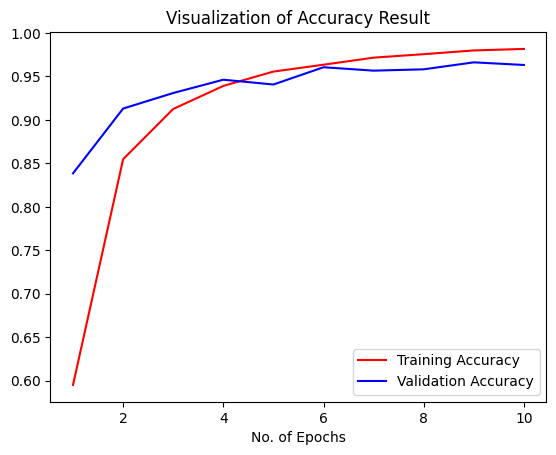

In [28]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [29]:
class_name = validation_set.class_names

In [30]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [31]:
y_pred = model.predict(test_set)
y_pred

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 345s 20ms/step


array([[1.0000000e+00, 5.7666791e-11, 3.7801910e-12, ..., 3.0518414e-16,
        1.3916449e-15, 3.3650533e-15],
       [9.9999011e-01, 1.2163501e-06, 4.5365226e-08, ..., 1.1862077e-10,
        3.3825040e-11, 3.5405363e-11],
       [1.0000000e+00, 7.5567336e-13, 5.6604315e-14, ..., 6.4694844e-22,
        4.8141607e-19, 1.4705470e-17],
       ...,
       [7.6008602e-11, 6.3461687e-14, 4.2916653e-11, ..., 7.6306340e-12,
        2.3056522e-11, 1.0000000e+00],
       [7.6939228e-14, 7.8008748e-18, 7.5490382e-14, ..., 6.9349980e-15,
        8.9773964e-15, 1.0000000e+00],
       [2.9506885e-16, 4.2337804e-17, 2.0106072e-15, ..., 2.1175150e-17,
        6.1032879e-13, 1.0000000e+00]], dtype=float32)

In [32]:
y_pred, y_pred.shape

(array([[1.0000000e+00, 5.7666791e-11, 3.7801910e-12, ..., 3.0518414e-16,
         1.3916449e-15, 3.3650533e-15],
        [9.9999011e-01, 1.2163501e-06, 4.5365226e-08, ..., 1.1862077e-10,
         3.3825040e-11, 3.5405363e-11],
        [1.0000000e+00, 7.5567336e-13, 5.6604315e-14, ..., 6.4694844e-22,
         4.8141607e-19, 1.4705470e-17],
        ...,
        [7.6008602e-11, 6.3461687e-14, 4.2916653e-11, ..., 7.6306340e-12,
         2.3056522e-11, 1.0000000e+00],
        [7.6939228e-14, 7.8008748e-18, 7.5490382e-14, ..., 6.9349980e-15,
         8.9773964e-15, 1.0000000e+00],
        [2.9506885e-16, 4.2337804e-17, 2.0106072e-15, ..., 2.1175150e-17,
         6.1032879e-13, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [33]:
predicted_categories = tf.argmax(y_pred, axis=1)

In [34]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [35]:
y_true = tf.argmax(true_categories, axis=1)

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.98      0.96       504
                                 Apple___Black_rot       0.97      0.99      0.98       497
                          Apple___Cedar_apple_rust       0.97      0.99      0.98       440
                                   Apple___healthy       0.97      0.98      0.97       502
                               Blueberry___healthy       0.97      0.99      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.93      1.00      0.96       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.92      0.94      0.93       410
                       Corn_(maize)___Common_rust_       0.99      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.96      0.95      0.

In [37]:
cm = confusion_matrix(y_true, predicted_categories)
cm

array([[493,   2,   0, ...,   0,   0,   0],
       [  0, 492,   0, ...,   0,   0,   0],
       [  0,   0, 437, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 487,   0,   0],
       [  0,   0,   0, ...,   0, 448,   0],
       [  0,   0,   0, ...,   0,   1, 475]], dtype=int64)

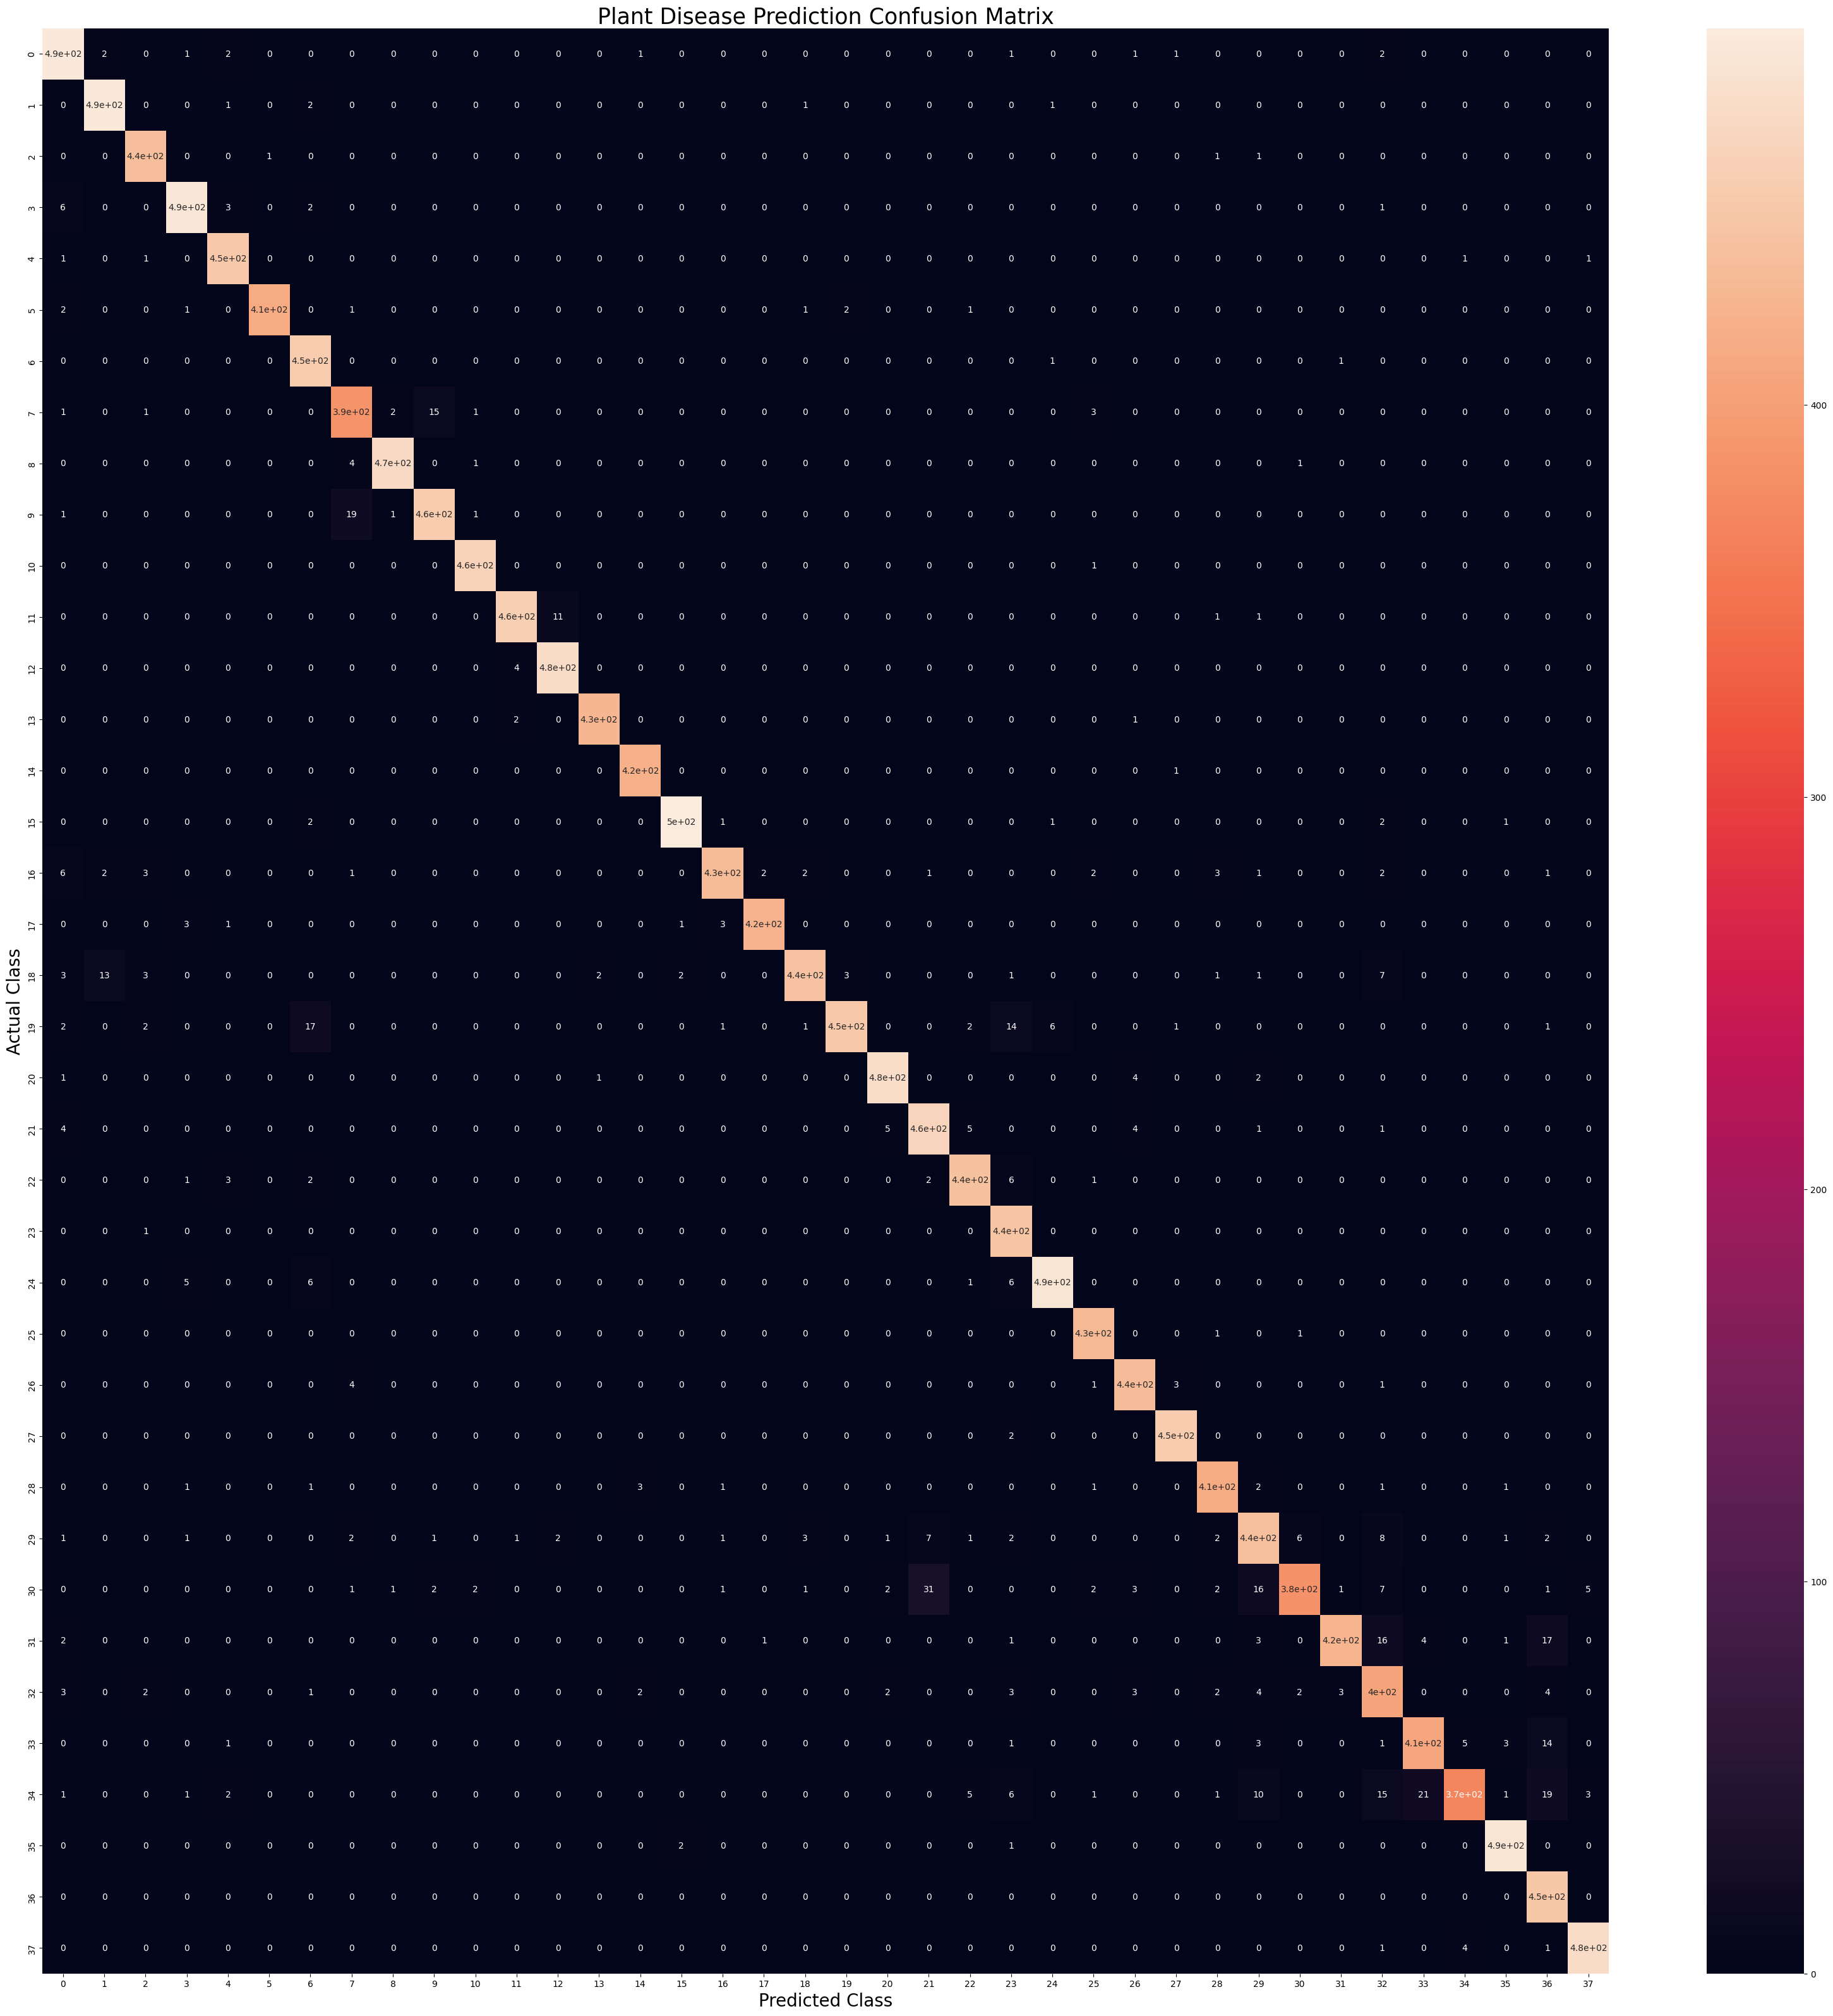

In [38]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()